# **Batch, Mini-Batch, and Stochastic Gradient Descent**


---


## **Import Necessary Libraries**


In [372]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-darkgrid")

## **Load the Data**

- The first three columns are x1,x2, and x3.

- The last column is the target label y.


In [ ]:
data = pd.read_csv("./Data/Multivariables_LR_Data.csv")

In [374]:
data.head()

,X1,X2,X3,y
0,73.0,80.0,75.0,152.0
1,93.0,88.0,93.0,185.0
2,89.0,91.0,90.0,180.0
3,96.0,98.0,100.0,196.0
4,73.0,66.0,70.0,142.0


In [375]:
data.shape

(25, 4)

## **Define Variables 𝑋 and 𝑦**


In [ ]:
X = data.drop("y", axis=1).values
X = np.insert(X, 0, 1, axis=1)

y = data["y"].values.reshape(-1, 1)

---


## **Batch Gradient Descent**


In [379]:
import numpy as np


def batch_gradient_descent(
    X,
    y,
    learning_rate=1e-5,
    max_iterations=100,
    gradient_tol=1e-2,
    loss_threshold=0.01,
    verbose=True,
):
    """
    Batch Gradient Descent.

    Args:
        X (np.ndarray): Feature matrix (m, n)
        y (np.ndarray): Target vector (m, 1)
        learning_rate (float): Learning rate
        max_iterations (int): Maximum iterations
        gradient_tol (float): Tolerance for gradient norm
        loss_threshold (float): Tolerance for loss change
        verbose (bool): If True, print detailed progress

    Returns:
        theta (np.ndarray): Final parameter values
        loss_history (list): List of loss values during training
    """
    m, n = X.shape
    theta = np.zeros((n, 1))
    loss_history = []

    for i in range(max_iterations):
        # Compute predictions
        h_X = X @ theta

        # Compute error
        error = h_X - y

        # Compute cost (MSE)
        cost = (1 / (2 * m)) * np.sum(error**2)
        loss_history.append(cost)

        # Compute gradient
        gradient = (1 / m) * (X.T @ error)
        gradient_norm = np.linalg.norm(gradient)

        # Print detailed progress
        if verbose and (i % 10 == 0 or i == max_iterations - 1):
            print(f" Iteration {i+1} ".center(60, "—") + "\n")
            print("Predictions (h(x)):\n", h_X.ravel(), "\n")
            print("Error vector (e = h(x) - y):\n", error.ravel(), "\n")
            print(f"Cost function J(θ) = (1/2m) * Σ(e²): {cost:.6f}")
            print("Gradient (▽J(θ) = (1/m) * Σ(ex)):\n", gradient.ravel())
            print(f"Gradient norm: {gradient_norm:.6f}\n")

        # Check convergence by gradient norm
        if gradient_norm < gradient_tol:
            print(f"Convergence achieved (gradient norm) at iteration {i + 1}.")
            break

        # Check convergence by loss change
        if i > 0:
            loss_change = abs(loss_history[-2] - loss_history[-1])
            if loss_change < loss_threshold:
                print(f"Convergence achieved (loss change) at iteration {i + 1}.")
                break

        # Update parameters
        theta -= learning_rate * gradient

    return theta, loss_history

In [380]:
final_theta, batch_loss = batch_gradient_descent(
    X,
    y,
    learning_rate=0.00001,
    max_iterations=100,
    gradient_tol=0.01,
    loss_threshold=0.01,
    verbose=True,
)

print("Final theta:", final_theta.ravel())

——————————————————————— Iteration 1 ————————————————————————

Predictions (h(x)):
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.] 

Error vector (e = h(x) - y):
 [-152. -185. -180. -196. -142. -101. -149. -115. -175. -164. -141. -141.
 -184. -152. -148. -192. -147. -183. -177. -159. -177. -175. -175. -149.
 -192.] 

Cost function J(θ) = (1/2m) * Σ(e²): 13405.980000
Gradient (▽J(θ) = (1/m) * Σ(ex)):
 [  -162.04 -13075.8  -13147.2  -13467.08]
Gradient norm: 22917.545989

——————————————————————— Iteration 11 ———————————————————————

Predictions (h(x)):
 [136.54370745 164.11723835 161.70497145 176.11140518 125.16520267
  92.28343848 131.82794868  97.73245245 153.38320071 142.07589193
 127.00820468 125.23559301 167.06119113 138.87358742 132.43481469
 166.54230751 132.25723856 158.20695094 159.26790569 142.50679315
 154.58894237 153.96607353 147.38732579 137.66305595 170.08672518] 

Error vector (e = h(x) - y):
 [-15.45629255 -20.88276165 -18.29502855 -19.88859

### **Plot Loss Function**


In [381]:
def plot_loss(loss, title="Loss over Updates", color="r", marker="o"):
    plt.figure(figsize=(10, 5))
    plt.plot(range(len(loss)), loss, f"{marker}-{color}", label="Loss")
    plt.title(title)
    plt.xlabel(f"Update Step (Total: {len(loss)})")
    plt.ylabel("Loss (J(θ))")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

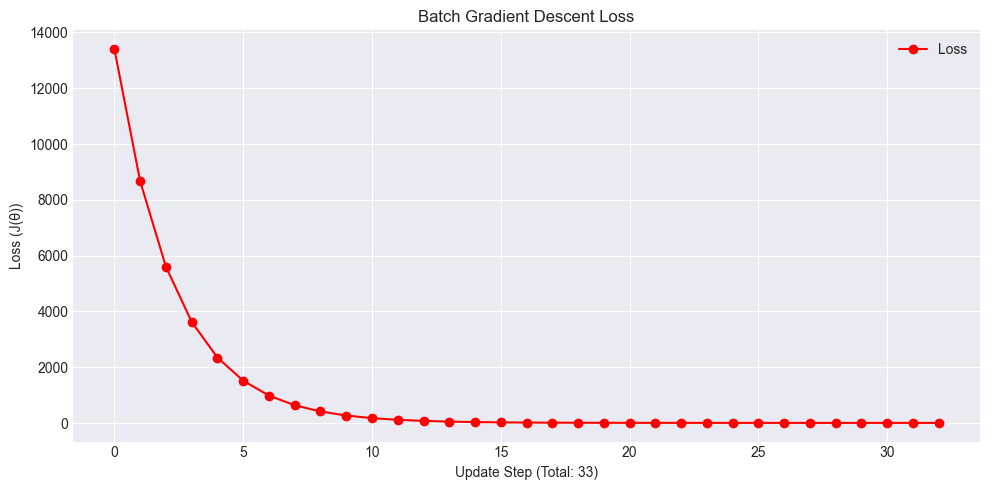

In [392]:
plot_loss(batch_loss, title="Batch Gradient Descent Loss")

---


## **Mini-Batch Gradient Descent**


In [383]:
def mini_batch_gradient_descent(
    X,
    y,
    learning_rate=1e-5,
    max_iterations=100,
    batch_size=32,
    gradient_tol=1e-2,
    loss_threshold=0.01,
    verbose=True,
):
    """
    Mini-Batch Gradient Descent.

    Args:
        X (np.ndarray): Feature matrix (m, n)
        y (np.ndarray): Target vector (m, 1)
        learning_rate (float): Learning rate
        max_iterations (int): Number of full passes over data
        batch_size (int): Size of each mini-batch
        gradient_tol (float): Gradient norm threshold
        loss_threshold (float): Loss change threshold
        verbose (bool): If True, print detailed progress

    Returns:
        theta (np.ndarray): Learned parameters
        loss_history (list): History of cost values
    """
    m, n = X.shape
    theta = np.zeros((n, 1))
    loss_history = []

    for iter_num in range(max_iterations):
        # Shuffle data at the start of each epoch
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for start_idx in range(0, m, batch_size):
            end_idx = min(start_idx + batch_size, m)
            X_batch = X_shuffled[start_idx:end_idx]
            y_batch = y_shuffled[start_idx:end_idx]

            # Compute predictions
            h_X = X_batch @ theta
            error = h_X - y_batch

            # Compute gradient
            gradient = (X_batch.T @ error) / len(X_batch)
            gradient_norm = np.linalg.norm(gradient)

            # Update theta
            theta -= learning_rate * gradient

            # Append full dataset cost after each update
            h_full = X @ theta
            error_full = h_full - y
            cost_full = (1 / (2 * m)) * np.sum(error_full**2)
            loss_history.append(cost_full)

            # Check convergence by gradient norm
            if gradient_norm < gradient_tol:
                print(
                    f"Convergence by gradient norm at iteration {iter_num+1}, batch starting at {start_idx}"
                )
                return theta, loss_history

        # Print progress every N epochs or last epoch
        if verbose and (iter_num % 10 == 0 or iter_num == max_iterations - 1):
            print(f" Iteration {iter_num+1} ".center(60, "—") + "\n")
            print(f"Cost function (J(θ) = (1/2m) * Σ(e²)): {cost_full:.6f}")
            print(f"Gradient norm: {gradient_norm:.6f}\n")

        # Check convergence by loss change (after full epoch)
        if iter_num > 0:
            batches_per_epoch = (m + batch_size - 1) // batch_size
            loss_change = abs(loss_history[-1] - loss_history[-batches_per_epoch])
            if loss_change < loss_threshold:
                print(f"Convergence by loss change at iteration {iter_num+1}")
                break

    return theta, loss_history

In [384]:
# Example usage
final_theta, mini_batch_loss = mini_batch_gradient_descent(
    X,
    y,
    learning_rate=0.0001,
    max_iterations=1000,
    batch_size=16,
    gradient_tol=0.01,
    loss_threshold=0.01,
    verbose=True,
)

print("Final theta:", final_theta.ravel())

——————————————————————— Iteration 1 ————————————————————————

Cost function (J(θ) = (1/2m) * Σ(e²)): 11028.279168
Gradient norm: 21567.926951

——————————————————————— Iteration 11 ———————————————————————

Cost function (J(θ) = (1/2m) * Σ(e²)): 1295.645559
Gradient norm: 6950.439357

——————————————————————— Iteration 21 ———————————————————————

Cost function (J(θ) = (1/2m) * Σ(e²)): 216.731923
Gradient norm: 3137.738191

——————————————————————— Iteration 31 ———————————————————————

Cost function (J(θ) = (1/2m) * Σ(e²)): 80.940751
Gradient norm: 1954.561086

——————————————————————— Iteration 41 ———————————————————————

Cost function (J(θ) = (1/2m) * Σ(e²)): 48.747780
Gradient norm: 1317.448230

——————————————————————— Iteration 51 ———————————————————————

Cost function (J(θ) = (1/2m) * Σ(e²)): 14.937181
Gradient norm: 913.193891

——————————————————————— Iteration 61 ———————————————————————

Cost function (J(θ) = (1/2m) * Σ(e²)): 12.166066
Gradient norm: 395.746094

——————————————————————

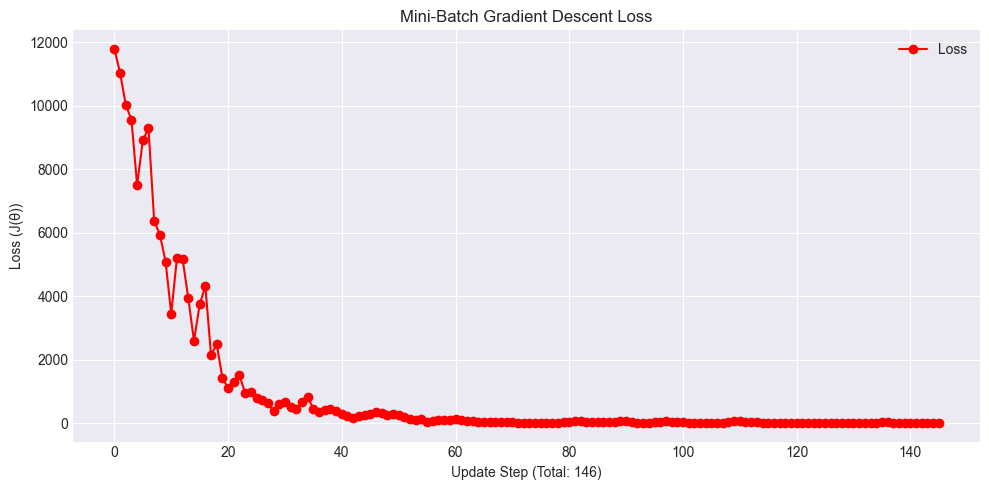

In [391]:
plot_loss(mini_batch_loss, title="Mini-Batch Gradient Descent Loss")

---


## **Stochastic Gradient Descent**


In [386]:
def stochastic_gradient_descent(
    X,
    y,
    learning_rate=1e-5,
    max_iterations=100,
    gradient_tol=1e-2,
    loss_threshold=0.01,
    verbose=True,
):
    """
    Stochastic Gradient Descent (SGD).

    Args:
        X (np.ndarray): Feature matrix (m, n)
        y (np.ndarray): Target vector (m, 1)
        learning_rate (float): Learning rate
        max_iterations (int): Number of epochs
        gradient_tol (float): Gradient norm threshold
        loss_threshold (float): Loss change threshold
        verbose (bool): If True, print detailed progress

    Returns:
        theta (np.ndarray): Learned parameters
        loss_history (list): History of cost values (per epoch)
    """
    m, n = X.shape
    theta = np.zeros((n, 1))
    loss_history = []

    for iter_num in range(max_iterations):
        # Shuffle data at the start of each epoch
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(m):
            X_i = X_shuffled[i].reshape(1, -1)  # (1, n)
            y_i = y_shuffled[i].reshape(1, 1)  # (1, 1)

            # Compute prediction and error
            h_X = X_i @ theta
            error = h_X - y_i

            # Gradient
            gradient = X_i.T @ error
            gradient_norm = np.linalg.norm(gradient)

            # Update parameters
            theta -= learning_rate * gradient

            # Optional: early stop based on gradient
            if gradient_norm < gradient_tol:
                print(
                    f"Convergence by gradient norm at epoch {iter_num+1}, sample {i+1}"
                )
                return theta, loss_history

        # Compute cost at the end of the epoch
        h_X_epoch = X @ theta
        error_epoch = h_X_epoch - y
        cost = (1 / (2 * m)) * np.sum(error_epoch**2)
        loss_history.append(cost)

        # Print progress
        if verbose and (iter_num % 10 == 0 or iter_num == max_iterations - 1):
            print(f" Iteration {iter_num+1} ".center(60, "—") + "\n")
            print(f"Cost function (J(θ) = (1/2m) * Σ(e²)): {cost:.6f}")
            print(f"Gradient norm (last sample): {gradient_norm:.6f}\n")

        # Check loss change convergence
        if iter_num > 0:
            loss_change = abs(loss_history[-1] - loss_history[-2])
            if loss_change < loss_threshold:
                print(f"Convergence by loss change at epoch {iter_num+1}")
                break

    return theta, loss_history

In [387]:
final_theta, stochastic_loss = stochastic_gradient_descent(
    X,
    y,
    learning_rate=0.0001,
    max_iterations=100,
    gradient_tol=0.01,
    loss_threshold=0.01,
    verbose=True,
)

——————————————————————— Iteration 1 ————————————————————————

Cost function (J(θ) = (1/2m) * Σ(e²)): 456.702058
Gradient norm (last sample): 3759.830922

——————————————————————— Iteration 11 ———————————————————————

Cost function (J(θ) = (1/2m) * Σ(e²)): 104.787439
Gradient norm (last sample): 2062.457215

——————————————————————— Iteration 21 ———————————————————————

Cost function (J(θ) = (1/2m) * Σ(e²)): 685.594349
Gradient norm (last sample): 5046.683786

——————————————————————— Iteration 31 ———————————————————————

Cost function (J(θ) = (1/2m) * Σ(e²)): 49.724991
Gradient norm (last sample): 2123.677405

——————————————————————— Iteration 41 ———————————————————————

Cost function (J(θ) = (1/2m) * Σ(e²)): 3.270433
Gradient norm (last sample): 606.906485

——————————————————————— Iteration 51 ———————————————————————

Cost function (J(θ) = (1/2m) * Σ(e²)): 451.114811
Gradient norm (last sample): 3553.919337

——————————————————————— Iteration 61 ———————————————————————

Cost function (J(θ

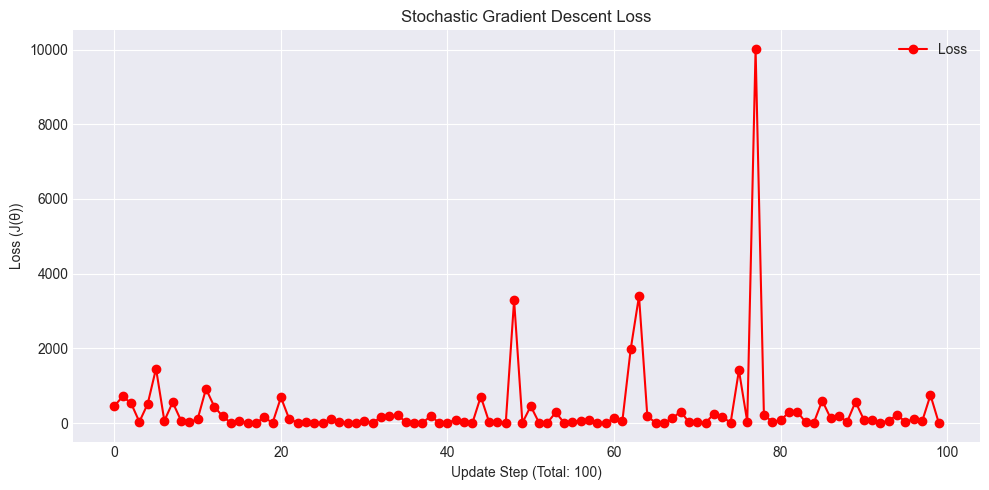

In [390]:
plot_loss(stochastic_loss, title="Stochastic Gradient Descent Loss")

---


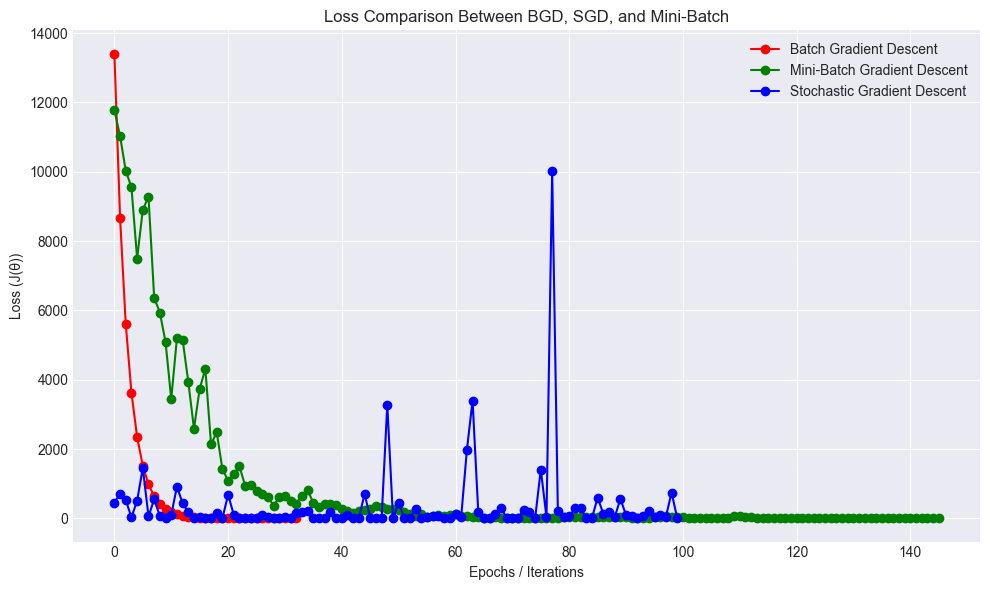

In [389]:
plt.figure(figsize=(10, 6))

plt.plot(batch_loss, "o-r", label="Batch Gradient Descent")
plt.plot(mini_batch_loss, "o-g", label="Mini-Batch Gradient Descent")
plt.plot(stochastic_loss, "o-b", label="Stochastic Gradient Descent")


plt.title("Loss Comparison Between BGD, SGD, and Mini-Batch")
plt.xlabel("Epochs / Iterations")
plt.ylabel("Loss (J(θ))")

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

---
